In [26]:
# Imports
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Arrow, Circle
import numpy as np
import pandas as pd

def read_file(path):
    csv = pd.read_csv(path, header=None).set_index(1)

    offset = 4
    num_channels = (len(csv.columns) - offset - 1)//4
    num_frames = len(csv)

    csv = pd.DataFrame(csv)
    timings = csv.iloc[:,0:offset]
    accuracy = [csv.iloc[:,(offset + 4*i):(offset + 4*i + 4)] for i in range(num_channels)]

    trace_to_events_num = [0 for _ in range(num_frames)]
    trace_to_events_life = [0 for _ in range(num_frames)]
    simulated_events_num = [0 for _ in range(num_frames)]
    simulated_events_life = [0 for _ in range(num_frames)]
    timing = [0 for _ in range(num_frames)]

    for frame in range(num_frames):
        for acc in accuracy:
            trace_to_events_num[frame] += acc.iloc[frame, 0]
            trace_to_events_life[frame] += acc.iloc[frame, 2]
            simulated_events_num[frame] += acc.iloc[frame, 1]
            simulated_events_life[frame] += acc.iloc[frame, 3]

        timing[frame] = timings.iloc[frame, 1]

        trace_to_events_num[frame] /= len(accuracy)
        trace_to_events_life[frame] /= len(accuracy)
        simulated_events_num[frame] /= len(accuracy)
        simulated_events_life[frame] /= len(accuracy)

        
    return (timing, trace_to_events_num,trace_to_events_life,simulated_events_num,simulated_events_life, num_frames)

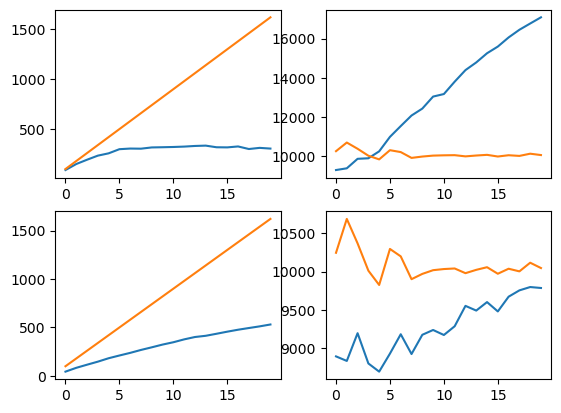

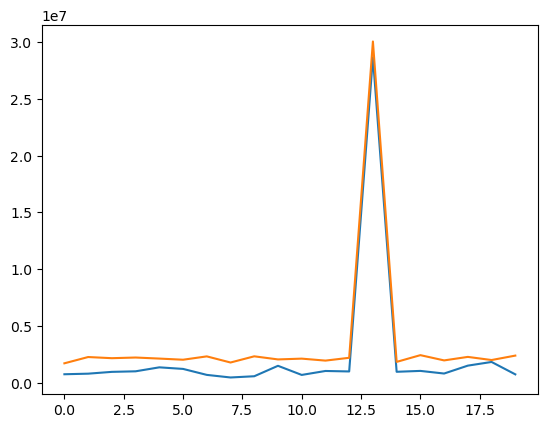

In [29]:
plt.figure()
(time1, tte_num, tte_life, sim_num, sim_life, num_frames) = read_file("../events-analyser/data1.csv")
plt.subplot(2,2,1)
plt.plot(range(num_frames), tte_num)
plt.plot(range(num_frames), sim_num)
plt.subplot(2,2,2)
plt.plot(range(num_frames), tte_life)
plt.plot(range(num_frames), sim_life)

(time2, tte_num, tte_life, sim_num, sim_life, num_frames) = read_file("../events-analyser/data2.csv")
plt.subplot(2,2,3)
plt.plot(range(num_frames), tte_num)
plt.plot(range(num_frames), sim_num)
plt.subplot(2,2,4)
plt.plot(range(num_frames), tte_life)
plt.plot(range(num_frames), sim_life)

plt.figure()
plt.plot(range(num_frames), time1)
plt.plot(range(num_frames), time2)